In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Load data and make data frame

In [5]:
df = pd.read_csv("./genomes_fasta/genome_quality_report.tsv", sep="\t")
df.head()

,Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Additional_Notes
0,3045160_421,97.65,2.79,Gradient Boost (General Model),11,0.899,125725,287.254945,1740059,0.45,1820,NaN
1,2202732_9,97.17,4.17,Neural Network (Specific Model),11,0.911,21715,239.937397,1435948,0.30,1821,NaN
2,1714258_3,90.05,0.06,Neural Network (Specific Model),11,0.853,98570,241.859750,1760081,0.61,2082,NaN
3,2020860_61,99.92,1.06,Neural Network (Specific Model),11,0.894,590720,275.321820,2180697,0.46,2374,NaN
4,94694_5,99.45,0.14,Neural Network (Specific Model),11,0.892,26831,279.394387,1268528,0.45,1354,NaN


# Visualization

## Contamination vs. Compeletness

In [6]:
condition = (df["Contamination"] < 5) & (df["Completeness"] > 85)
df["meets_criteria"] = condition.map({True: "Yes", False: "No"})

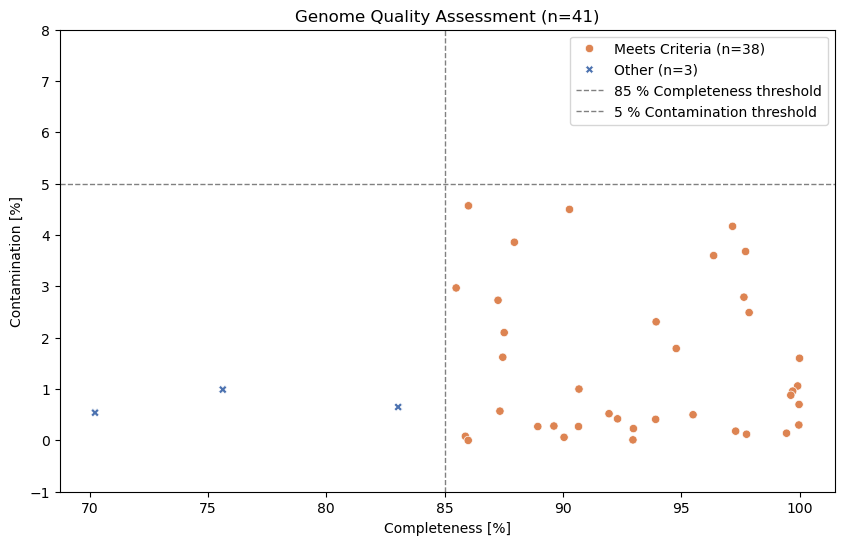

In [7]:
plt.figure(figsize=(10, 6))
len_genomes = len(df)
len_meets_criteria_yes =  len(df[df["meets_criteria"] == "Yes"])
len_meets_criteria_no = len_genomes - len_meets_criteria_yes
plot = sns.scatterplot(
    data=df,
    x="Completeness",
    y="Contamination",
    hue="meets_criteria",
    style="meets_criteria",  
    palette={"Yes": "#DD8452", "No": "#4C72B0"}  

)
vline_x = 85
hline_y = 5
plt.axhline(y=hline_y, linestyle='--', color='gray', linewidth=1)
plt.axvline(x=vline_x, linestyle='--', color='gray', linewidth=1)
plt.xlabel("Completeness [%]")
plt.ylabel("Contamination [%]")
plt.ylim(-1, 8)

handles, labels = plot.get_legend_handles_labels()
vline_legend = Line2D([0], [0], color='gray', lw=1, linestyle='--', label=f'vline @ x={vline_x}')
hline_legend = Line2D([0], [0], color='gray', lw=1, linestyle='--', label=f'hline @ y={hline_y}')

handles.extend([vline_legend, hline_legend])
labels.extend([f"Vertical line at x = {vline_x}", f"Horizontal line at y = {hline_y}"])

plt.legend(
    handles=handles,       
    labels=[f"Meets Criteria (n={len_meets_criteria_yes})", f"Other (n={len_meets_criteria_no})", f"{vline_x} % Completeness threshold", f"{hline_y} % Contamination threshold"], 
    
    loc='upper right',          
    frameon=True               
)
plt.title(f"Genome Quality Assessment (n={len_genomes})")
plt.show()

# Extract tRNA number from BV-BRC

In [8]:
# import requests
# import json

In [9]:
# # Use API 
# n_trna = []
# for name in df["Name"]:
#     name = name.replace("_", ".")
#     result = requests.get(f"https://www.bv-brc.org/api/genome/{name}")
#     result_dict = json.loads(result.text)
#     n_trna.append(result_dict["trna"])    

In [10]:
# # Add tRNA number to df
# df["n_trna"] = n_trna

In [11]:
# # Save result to csv
# df.to_csv("./genome_quality_report_result.csv")

## Plot Genome size vs. Number of tRNAs

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
df = pd.read_csv("./genomes_fasta/genome_quality_report_result.csv")

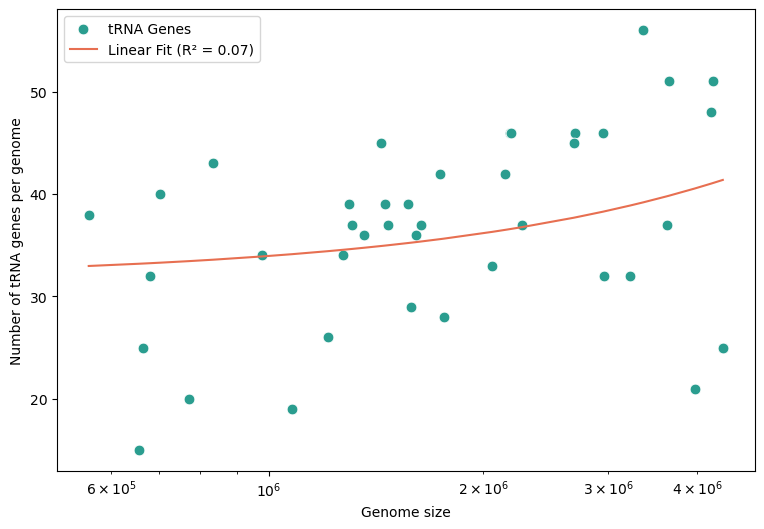

In [15]:
y_trna=df["n_trna"].values
x_genome_size=df["Genome_Size"].values
fig, ax = plt.subplots(figsize = (9, 6))


X = x_genome_size.reshape(-1, 1)
y = y_trna

scatter_color = "#2a9d8f"  
line_color = "#e76f51"     

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_linear = lin_reg.predict(X)
r2_linear = r2_score(y, y_pred_linear)

sns.scatterplot(x=df["Genome_Size"], y=df["n_trna"], color=scatter_color, label='tRNA Genes', s=60, edgecolor='w')
sns.lineplot(x=x_genome_size, y=y_pred_linear, color=line_color, label=f'Linear Fit (R² = {r2_linear:.2f})')

ax.set_ylabel("Number of tRNA genes per genome")
ax.set_xlabel("Genome size")
ax.set_xscale("log")
# ax.set_yscale("log")

## Plot Number of protein-coding sequences per genome vs. Number of tRNAs

Text(0.5, 0, 'Genome size')

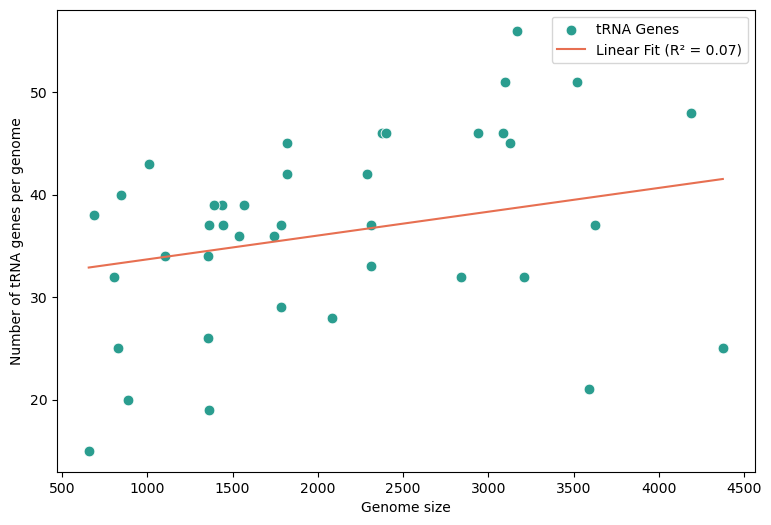

In [16]:
y_trna=df["n_trna"].values
x_genome_n_genes=df["Total_Coding_Sequences"].values
fig, ax = plt.subplots(figsize = (9, 6))

# Reshape x_genome_size to be 2D: (n_samples, 1)
X = x_genome_n_genes.reshape(-1, 1)
y = y_trna

scatter_color = "#2a9d8f"  
line_color = "#e76f51"     

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_linear = lin_reg.predict(X)
r2_linear = r2_score(y, y_pred_linear)

sns.scatterplot(x=df["Total_Coding_Sequences"], y=df["n_trna"], color=scatter_color, label='tRNA Genes', s=60, edgecolor='w')
sns.lineplot(x=x_genome_n_genes, y=y_pred_linear, color=line_color, label=f'Linear Fit (R² = {r2_linear:.2f})')

ax.set_ylabel("Number of tRNA genes per genome")
ax.set_xlabel("Genome size")
# ax.set_xscale("log")
# ax.set_yscale("log")